In [1]:
import json
import numpy as np
import pandas as pd
import requests
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
url = "https://raw.githubusercontent.com/PawanKrGunjan/Natural-Language-Processing/main/Sarcasm%20Detection/sarcasm.json"

response = requests.get(url)
data = response.json()

df = pd.DataFrame(data)

In [3]:
df

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0
...,...,...,...
26704,https://www.huffingtonpost.com/entry/american-...,american politics in moral free-fall,0
26705,https://www.huffingtonpost.com/entry/americas-...,america's best 20 hikes,0
26706,https://www.huffingtonpost.com/entry/reparatio...,reparations and obama,0
26707,https://www.huffingtonpost.com/entry/israeli-b...,israeli ban targeting boycott supporters raise...,0


In [4]:
sentence = df['headline']
vectorizer = TfidfVectorizer(stop_words='english')

vectorized_documents = vectorizer.fit_transform(sentence)

In [6]:
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(vectorized_documents.toarray())

In [7]:
num_clusters = 2
kmeans = KMeans(n_clusters=num_clusters, n_init=5, max_iter=500, random_state=42)
kmeans.fit(vectorized_documents)

KMeans(max_iter=500, n_clusters=2, n_init=5, random_state=42)

In [8]:
results = pd.DataFrame()
results['document'] = sentence
results['cluster'] = kmeans.labels_

print(results.sample(5))

                                                document  cluster
20797                        baby loses train of thought        0
493    paul beatty becomes first american to win man ...        0
11547  boy scouts celebrate proud history of preparin...        0
16596  new study reveals nothing pfizer's lawyers can...        0
25518  christmas tree still sitting on curb outside r...        0


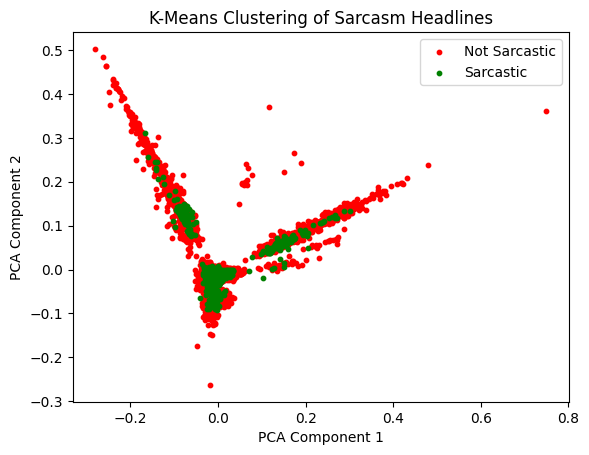

In [9]:
colors = ['red', 'green']
cluster_labels = ['Not Sarcastic', 'Sarcastic']
for i in range(num_clusters):
    plt.scatter(reduced_data[kmeans.labels_ == i, 0],
                reduced_data[kmeans.labels_ == i, 1],
                s=10, color=colors[i],
                label=f'{cluster_labels[i]}')

plt.legend()
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('K-Means Clustering of Sarcasm Headlines')
plt.show()